<a href="https://colab.research.google.com/github/maskot1977/PythonCourse2019/blob/master/q27a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

x_observed = np.linspace(-10, 10, 11) # 観測点

In [0]:
def spline(x_observed, y_observed):
    def accept_variables(x_latent):
        interporation = []
        for x in x_latent:
            for j in range (len(x_observed) - 1):
                if x_observed[j] <= x and x <= x_observed[j + 1]:
                    a = coeff[4 * j]
                    b = coeff[4 * j + 1]
                    c = coeff[4 * j + 2]
                    d = coeff[4 * j + 3]
                    interporation.append(a * x**3 + b * x**2 + c * x + d)
                    break
        return interporation

    n = len(x_observed) - 1
    A = np.zeros((4 * n, 4 * n))
    b = np.zeros(4 * n)
        
    for i in range (n - 1):
        A[4 * i][4 * i + 0] = x_observed[i]**3
        A[4 * i][4 * i + 1] = x_observed[i]**2
        A[4 * i][4 * i + 2] = x_observed[i]
        A[4 * i][4 * i + 3] = 1
        b[4 * i] = y_observed[i]
        
        A[4 * i + 1][4 * i + 0] = x_observed[i + 1]**3
        A[4 * i + 1][4 * i + 1] = x_observed[i + 1]**2
        A[4 * i + 1][4 * i + 2] = x_observed[i + 1]
        A[4 * i + 1][4 * i + 3] = 1
        b[4 * i + 1] = y_observed[i + 1]
        
        A[4 * i + 2][4 * i + 0] = 3 * x_observed[i + 1]**2
        A[4 * i + 2][4 * i + 1] = 2 * x_observed[i + 1]
        A[4 * i + 2][4 * i + 2] = 1
        A[4 * i + 2][4 * i + 4] = -3 * x_observed[i + 1]**2
        A[4 * i + 2][4 * i + 5] = -2 * x_observed[i+1]
        A[4 * i + 2][4 * i + 6] = -1
        
        A[4 * i + 3][4 * i + 0] = 6 * x_observed[i+1]
        A[4 * i + 3][4 * i + 1] = 2
        A[4 * i + 3][4 * i + 4] = -6 * x_observed[i+1]
        A[4 * i + 3][4 * i + 5] = -2
        
    A[4 * n - 4][4 * n - 4] = x_observed[n - 1]**3
    A[4 * n - 4][4 * n - 3] = x_observed[n - 1]**2
    A[4 * n - 4][4 * n - 2] = x_observed[n - 1]
    A[4 * n - 4][4 * n - 1] = 1
    b[4 * n - 4] = y_observed[n - 1]
    
    A[4 * n - 3][4 * n - 4] = x_observed[n]**3
    A[4 * n - 3][4 * n - 3] = x_observed[n]**2
    A[4 * n - 3][4 * n - 2] = x_observed[n]
    A[4 * n - 3][4 * n - 1] = 1
    b[4 * n - 3] = y_observed[n]
    
    A[4 * n - 2][0] = 6 * x_observed[0]
    A[4 * n - 2][1] = 2
    
    A[4 * n - 1][4 * n - 4] = 6 * x_observed[n]
    A[4 * n - 1][4 * n - 3] = 2
    
    coeff = np.linalg.solve(A, b)

    return accept_variables

In [3]:
fitted_curve = spline(x_observed, f(x_observed))
fitted_curve

<function __main__.spline.<locals>.accept_variables>

In [4]:
x_latent = np.linspace(-10, 10, 101)
fitted_curve(x_latent)

[4.539786870243548e-05,
 9.048064640727535e-05,
 0.0001345884209891894,
 0.0001767461893252241,
 0.00021597894829246053,
 0.00025131169476794515,
 0.0002817694256287591,
 0.0003063771377519488,
 0.00032415982801459534,
 0.0003341424932937452,
 0.0003353501304664795,
 0.0003296300602972646,
 0.0003301188990996462,
 0.00035277558707499934,
 0.00041355906442427925,
 0.0005284282713485522,
 0.0007133421480490509,
 0.0009842596347267862,
 0.0013571396715829354,
 0.0018479411988185646,
 0.002472623156634768,
 0.0032455368619338093,
 0.004174603138422342,
 0.005266135186508231,
 0.006526446206599257,
 0.007961849399103257,
 0.009578657964428028,
 0.011383185102981433,
 0.013381744015171282,
 0.015580647901405384,
 0.01798620996209155,
 0.020669149385406538,
 0.023957809310600098,
 0.028244938864692593,
 0.03392328717470239,
 0.04138560336764974,
 0.05102463657055345,
 0.06323313591043256,
 0.07840385051430698,
 0.09692952950919542,
 0.11920292202211746,
 0.1454823112815053,
 0.175488116921440

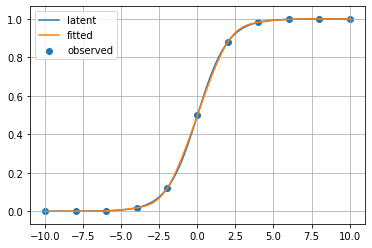

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

fitted_curve = spline(x_observed, f(x_observed))
plt.scatter(x_observed, f(x_observed), label="observed")
plt.plot(x_latent, f(x_latent), label="latent")
plt.plot(x_latent, fitted_curve(x_latent), label="fitted")
plt.grid()
plt.legend()
plt.show()

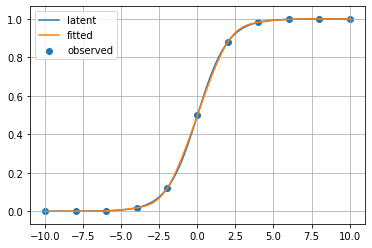

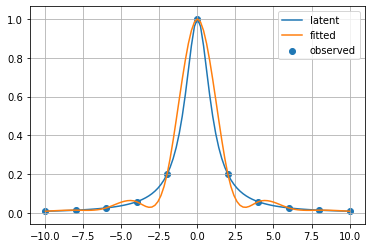

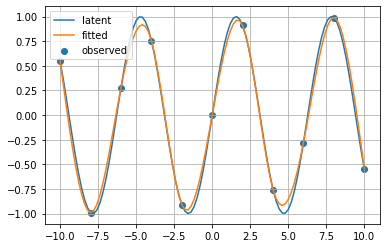

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

for func in [f, g, h]:
    fitted_curve = spline(x_observed, func(x_observed))
    plt.scatter(x_observed, func(x_observed), label="observed")
    plt.plot(x_latent, func(x_latent), label="latent")
    plt.plot(x_latent, fitted_curve(x_latent), label="fitted")
    plt.grid()
    plt.legend()
    plt.show()